In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
npo = pd.read_csv("EDNPOs.csv")
npo = npo.set_index(["nccs_level_1","name","ein2"])
npo = npo.sort_index(ascending=False)
npo

Unnamed: 0.2  \
nccs_level_1  name                                               ein2                           
UNDEFINED     ZACHARYS ELEMENTARY PARENT TEACHER ORGANIZATION    EIN-72-1510892        141566   
              WORTH & DOT HOWARD FOUNDATION                      EIN-86-0984133          5562   
              WISCONSIN ASSOCIATION OF EDUCATIONAL OPPORTUNIT... EIN-39-1595874         82613   
              WILLIAM J MARTIN FOUNDATION INC                    EIN-01-0660247          6942   
              VALOR RESIDENTIAL & EDUCATIONAL SERVICES           EIN-91-2154213        215832   
...                                                                                       ...   
501C3 CHARITY 1 BYTE COMPUTER LITERACY INC                       EIN-20-5477787         25390   
              1 2 READ FOUNDATION INC                            EIN-92-2926957        219994   
              0RIGINAL DESIGN MINISTRIES                         EIN-20-2230005         21490   
              02 SCHOLARSHIP FUND INC                            EIN-81-4049787        160106   
              01 LABS INC                                        EIN-84-3859290        184989   

                                                                                 Unnamed: 0.1  \
nccs_level_1  name                                               ein2                           
UNDEFINED     ZACHARYS ELEMENTARY PARENT TEACHER ORGANIZATION    EIN-72-1510892        141566   
              WORTH & DOT HOWARD FOUNDATION                      EIN-86-0984133          5562   
              WISCONSIN ASSOCIATION OF EDUCATIONAL OPPORTUNIT... EIN-39-1595874         82613   
              WILLIAM J MARTIN FOUNDATION INC                    EIN-01-0660247          6942   
              VALOR RESIDENTIAL & EDUCATIONAL SERVICES           EIN-91-2154213        215832   
...                                                                                       ...   
501C3 CHARITY 1 BYTE COMPUTER LITERACY INC                       EIN-20-5477787         25390   
              1 2 READ FOUNDATION INC                            EIN-92-2926957        219994   
              0RIGINAL DESIGN MINISTRIES                         EIN-20-2230005         21490   
              02 SCHOLARSHIP FUND INC                            EIN-81-4049787        160106   
              01 LABS INC                                        EIN-84-3859290        184989   

                                                                                 Unnamed: 0  \
nccs_level_1  name                                               ein2                         
UNDEFINED     ZACHARYS ELEMENTARY PARENT TEACHER ORGANIZATION    EIN-72-1510892      141566   
              WORTH & DOT HOWARD FOUNDATION                      EIN-86-0984133        5562   
              WISCONSIN ASSOCIATION OF EDUCATIONAL OPPORTUNIT... EIN-39-1595874       82613   
              WILLIAM J MARTIN FOUNDATION INC                    EIN-01-0660247        6942   
              VALOR RESIDENTIAL & EDUCATIONAL SERVICES           EIN-91-2154213      215832   
...                                                                                     ...   
501C3 CHARITY 1 BYTE COMPUTER LITERACY INC                       EIN-20-5477787       25390   
              1 2 READ FOUNDATION INC                            EIN-92-2926957      219994   
              0RIGINAL DESIGN MINISTRIES                         EIN-20-2230005       21490   
              02 SCHOLARSHIP FUND INC                            EIN-81-4049787      160106   
              01 LABS INC                                        EIN-84-3859290      184989   

                                                                                ntee_irs  \
nccs_level_1  name                                               ein2                      
UNDEFINED     ZACHARYS ELEMENTARY PARENT TEACHER ORGANIZATION    EIN-72-1510892      B12   
              WORTH & DOT HOWARD FOUNDATION  

In [45]:
org = np.array(["Scholarship","Single Support Fundraising","Fundraising","Education Services","Student Services","Advocacy","Research"])
service_org = npo[npo.Main_Category.isin(org)]
service_org["city"].value_counts()
top_10_cities = service_org["city"].value_counts().head(50)
service_org = service_org[service_org["city"].isin(top_10_cities.index)]
service_org = service_org.reset_index()
service_org["city"].value_counts()

city
NEW YORK         1944
CHICAGO          1139
HOUSTON           921
DALLAS            899
WASHINGTON        823
LOS ANGELES       715
LAS VEGAS         691
ATLANTA           625
AUSTIN            571
PITTSBURGH        500
PHILADELPHIA      490
SAN DIEGO         425
SAN ANTONIO       405
COLUMBUS          399
CHARLOTTE         382
PHOENIX           346
COLUMBIA          341
PORTLAND          336
MIAMI             331
ORLANDO           327
DENVER            326
MILWAUKEE         304
INDIANAPOLIS      303
SACRAMENTO        302
RALEIGH           301
CINCINNATI        301
SAINT LOUIS       293
LEXINGTON         292
SAN FRANCISCO     288
SAN JOSE          286
RICHMOND          279
ARLINGTON         277
JACKSONVILLE      273
TAMPA             268
SEATTLE           267
SPRINGFIELD       258
BALTIMORE         258
MINNEAPOLIS       241
FORT WORTH        238
LOUISVILLE        236
MADISON           236
BOSTON            232
WILMINGTON        232
KANSAS CITY       222
FRISCO            218
DETRO

Text(0.5, 1.0, 'Distribution of Education Service Orgs in Top 8 Metrapolitan Areas')

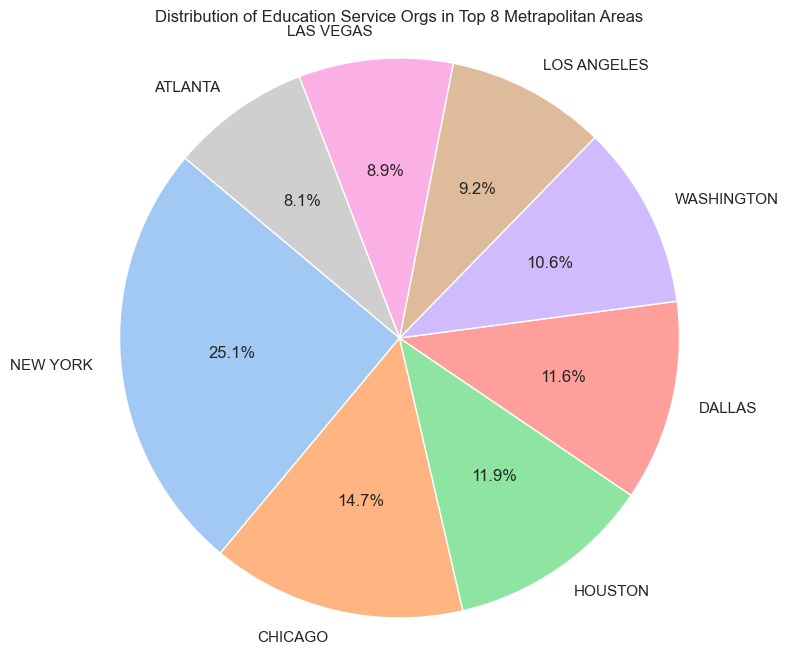

In [41]:
"""Pie graph for top 10 metrapolitan areas"""
plt.figure(figsize=(10, 8))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Education Service Orgs in Top 8 Metrapolitan Areas")

In [73]:
service_org.Main_Category.value_counts()
new_york = service_org[service_org["city"] == "NEW YORK"]
atlanta = service_org[service_org["city"] == "ATLANTA"]
chicago = service_org[service_org["city"] == "CHICAGO"]
houston = service_org[service_org["city"] == "HOUSTON"]
dallas = service_org[service_org["city"] == "DALLAS"]
washington = service_org[service_org["city"] == "WASHINGTON"]
losangeles = service_org[service_org["city"] == "LOS ANGELES"]
lasvegas = service_org[service_org["city"] == "LAS VEGAS"]
total = pd.concat([new_york, atlanta, chicago, houston, dallas, washington, losangeles, lasvegas])
new_york

,nccs_level_1,name,ein2,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ntee_irs,ntee_nccs,nteev2,nccs_level_2,...,org_year_last,org_year_count,org_pers_ico,org_name_sec,org_fiscal_period,ein,Main_Category,Main Category,Broader Code,Broadest Code
8,UNDEFINED,DOUGLAS MOORE FUND FOR AMERICAN OPERA INC,EIN-06-1633557,449,449,449,B82,B82,EDU-B82-RG,S,...,2024,22,% JAMES STEPLETON,NaN,8,61633557,Scholarship,Scholarship,Scholarship,School Improvement Org
11,UNDEFINED,COMMUNITY HEALTH AND EDUCATION FOUNDATION INC,EIN-27-0115791,50713,50713,50713,B11,B11,EDU-B00-MS,S,...,2024,19,% JAMES I JONES JR,NaN,11,270115791,Single Support Fundraising,Single Support Fundraising,Fundraising,School Improvement Org
12,UNDEFINED,COMMITTEE FOR THE ORGANIZATION OF THE GILLEN B...,EIN-13-3676916,15176,15176,15176,B90,B90,EDU-B90-RG,S,...,2024,30,% ALEXANDER ASNES,NaN,11,133676916,Education Services,Education Services,School Support,School Improvement Org
14,501CX NONPROFIT,ZETA PHI BETA SORORITY,EIN-20-0873666,232565,232565,232565,B82,B82,EDU-B82-RG,O,...,2024,20,% MICHELLE P STEVEN ED D,DELTA MU ZETA,1,200873666,Scholarship,Scholarship,Scholarship,School Improvement Org
59,501CX NONPROFIT,THE ROCKEFELLER UNIVERSITY FACULTY AND STUDENT...,EIN-13-6066979,15892,15892,15892,B80,B80,EDU-B80-RG,O,...,2024,30,NaN,NaN,10,136066979,Student Services,Student Services,School Support,School Improvement Org
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20397,501C3 CHARITY,12TRIBE FILMS FOUNDATION,EIN-20-8683997,26997,26997,26997,B12,B12,EDU-B00-MM,O,...,2024,6,% AVI ABELOW,NaN,6,208683997,Fundraising,Fundraising,Fundraising,School Improvement Org
20400,501C3 CHARITY,116KIDS INC,EIN-87-2550118,201587,201587,201587,B90,B90,EDU-B90-RG,O,...,2024,2,NaN,NaN,10,872550118,Education Services,Education Services,School Support,School Improvement Org
20407,501C3 CHARITY,100 ROSES FROM CONCRETE INC,EIN-86-3909734,197894,197894,197894,B90,B90,EDU-B90-RG,O,...,2024,3,NaN,NaN,1,863909734,Education Services,Education Services,School Support,School Improvement Org
20413,501C3 CHARITY,10 ARTS FOUNDATION INC,EIN-85-3117085,191750,191750,191750,B82,B82,EDU-B82-RG,O,...,2024,3,NaN,NaN,2,853117085,Scholarship,Scholarship,Scholarship,School Improvement Org


In [74]:
def get_quant_cols(df):
    return df[['totrev', 'total_income', 'total_assets', 'org_year_count', 'org_fiscal_period', 'org_year_first', 'org_year_last']]


In [75]:
"""Get new cols through feature engineering"""
def engineer_features(df):
    df["total_income_per_asset"] = df["total_income"] / df["total_assets"]
    df["total_income_per_year"] = df["total_income"] / df["org_year_count"]
    df["total_income/totrev"] = df["total_income"] / df["totrev"]
    df["total_income/total_asstes"] = df["total_income"] / df["total_assets"]
    return df

# Replace positive and negative infinity values with 1
def replace_infinity_with_one(df):
    return df.replace([np.inf, -np.inf], 1)

In [76]:
quant_newyork = replace_infinity_with_one(engineer_features(get_quant_cols(new_york))).fillna(1)
quant_atlanta = replace_infinity_with_one(engineer_features(get_quant_cols(atlanta))).fillna(1)
quant_chicago = replace_infinity_with_one(engineer_features(get_quant_cols(chicago))).fillna(1)
quant_houston = replace_infinity_with_one(engineer_features(get_quant_cols(houston))).fillna(1)
quant_dallas = replace_infinity_with_one(engineer_features(get_quant_cols(dallas))).fillna(1)
quant_washington = replace_infinity_with_one(engineer_features(get_quant_cols(washington))).fillna(1)
quant_losangeles = replace_infinity_with_one(engineer_features(get_quant_cols(losangeles))).fillna(1)
quant_lasvegas = replace_infinity_with_one(engineer_features(get_quant_cols(lasvegas))).fillna(1)
quant_total = pd.concat([quant_newyork, quant_atlanta, quant_chicago, quant_houston, quant_dallas, quant_washington, quant_losangeles, quant_lasvegas], axis=0)

/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/862974576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_income_per_asset"] = df["total_income"] / df["total_assets"]
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/862974576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_income_per_year"] = df["total_income"] / df["org_year_count"]
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/862974576.py:5: SettingWithCopyWarning: 
A value i

In [77]:
import numpy as np
from sklearn.ensemble import IsolationForest
# Separate the non-numeric columns (e.g., organization names)
"""Count nas in research"""
def get_outlier(df,df_total):
    model = IsolationForest(contamination=0.01, n_estimators=100, random_state=42)
    model.fit(df.select_dtypes(include=[np.number]))  # Fit only on numeric columns
    df["outlier"] = model.predict(df.select_dtypes(include=[np.number]))
    outliers = df[df['outlier'] == -1]
    
    # Extract the indices of the outliers
    outlier_indices = outliers.index.tolist()
    print(f"Number of outliers: {outliers.shape[0]}")
    df_total["outlier"] = False
    df_total.loc[outlier_indices, "outlier"] = True
    return outlier_indices



quant_newyork

,totrev,total_income,total_assets,org_year_count,org_fiscal_period,org_year_first,org_year_last,total_income_per_asset,total_income_per_year,total_income/totrev,total_income/total_asstes
8,1.0,3506.0,95784.0,22,8,2003,2024,0.036603,159.363636,1.000000,0.036603
11,1.0,0.0,0.0,19,11,2006,2024,1.000000,0.000000,1.000000,1.000000
12,1.0,1.0,1.0,30,11,1995,2024,1.000000,0.033333,1.000000,1.000000
14,0.0,0.0,0.0,20,1,2005,2024,1.000000,0.000000,1.000000,1.000000
59,92004.0,170049.0,0.0,30,10,1995,2024,1.000000,5668.300000,1.848278,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
20397,164142.0,164142.0,16244.0,6,6,2019,2024,10.104777,27357.000000,1.000000,10.104777
20400,0.0,0.0,0.0,2,10,2023,2024,1.000000,0.000000,1.000000,1.000000
20407,0.0,0.0,0.0,3,1,2022,2024,1.000000,0.000000,1.000000,1.000000
20413,7687.0,7687.0,16611.0,3,2,2022,2024,0.462766,2562.333333,1.000000,0.462766


In [78]:
new_york_outliers = get_outlier(quant_newyork,new_york)
atlanta_outliers = get_outlier(quant_atlanta,atlanta)
chicago_outliers = get_outlier(quant_chicago,chicago)
houston_outliers = get_outlier(quant_houston,houston)
dallas_outliers = get_outlier(quant_dallas,dallas)
washington_outliers = get_outlier(quant_washington,washington)
losangeles_outliers = get_outlier(quant_losangeles,losangeles)
lasvegas_outliers = get_outlier(quant_lasvegas,lasvegas) 
total_outliers = get_outlier(quant_total,total)

Number of outliers: 20
Number of outliers: 7
Number of outliers: 12


/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/864092428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["outlier"] = False
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/864092428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["outlier"] = False
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/864092428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Number of outliers: 10
Number of outliers: 9
Number of outliers: 9


/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/864092428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["outlier"] = False
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/864092428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["outlier"] = False
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/864092428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Number of outliers: 8
Number of outliers: 7


/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/864092428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["outlier"] = False
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_71709/864092428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["outlier"] = False


Number of outliers: 78


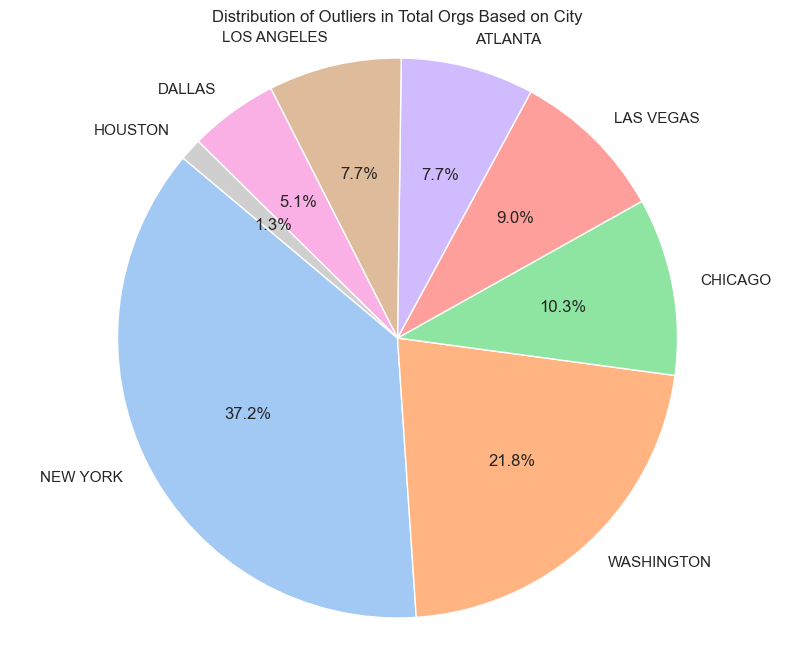

Index(['nccs_level_1', 'name', 'ein2', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'ntee_irs', 'ntee_nccs', 'nteev2', 'nccs_level_2',
       'nccs_level_3', 'totrev', 'total_income', 'total_assets', 'city',
       'state', 'f990_org_addr_zip', 'f990_org_addr_street',
       'census_cbsa_fips', 'census_cbsa_name', 'census_block_fips',
       'census_urban_area', 'census_state_abbr', 'census_county_name',
       'org_addr_full', 'org_addr_match', 'latitude', 'longitude',
       'geocoder_score', 'geocoder_match', 'bmf_subsection_code',
       'bmf_status_code', 'bmf_pf_filing_req_code', 'bmf_organization_code',
       'bmf_income_code', 'bmf_group_exempt_num', 'bmf_foundation_code',
       'bmf_filing_req_code', 'bmf_deductibility_code',
       'bmf_classification_code', 'bmf_asset_code', 'bmf_affiliation_code',
       'org_ruling_date', 'org_fiscal_year', 'ruleyear', 'org_year_first',
       'org_year_last', 'org_year_count', 'org_pers_ico', 'org_name_sec',
       'org_fiscal_p

In [96]:
"""Pie chart for distribution of outliers in tota outlier based on city"""
total_outliers = total[total["outlier"] == True]
plt.figure(figsize=(10, 8))
plt.pie(total_outliers["city"].value_counts(), labels=total_outliers["city"].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Outliers in Total Orgs Based on City")
plt.show()
total.columns


In [84]:
import matplotlib.pyplot as plt

def plot_outliers(df_total, x_col, y_col, city_name="City"):
    # Check that the selected columns exist
    if x_col not in df_total.columns or y_col not in df_total.columns:
        print(f"Columns '{x_col}' or '{y_col}' not found in the dataframe for {city_name}.")
        return

    # Plot
    plt.figure(figsize=(10, 6))
    
    # Non-outliers
    plt.scatter(
        df_total.loc[~df_total["outlier"], x_col],
        df_total.loc[~df_total["outlier"], y_col],
        label="Normal",
        alpha=0.6
    )
    
    # Outliers
    plt.scatter(
        df_total.loc[df_total["outlier"], x_col],
        df_total.loc[df_total["outlier"], y_col],
        color="red",
        label="Outliers",
        alpha=0.9
    )

    plt.title(f"{city_name} - {x_col} vs. {y_col} (Outliers in Red)")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



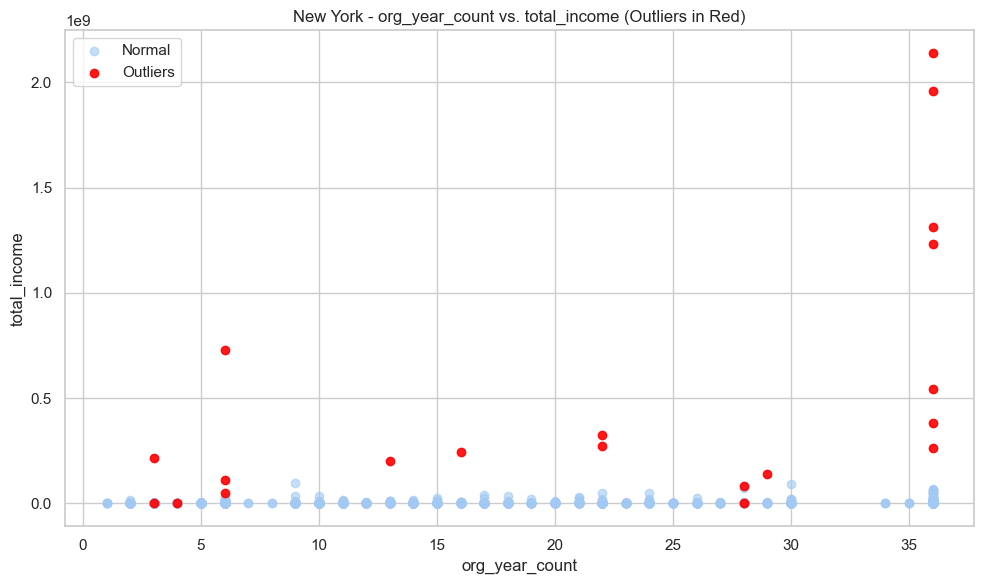

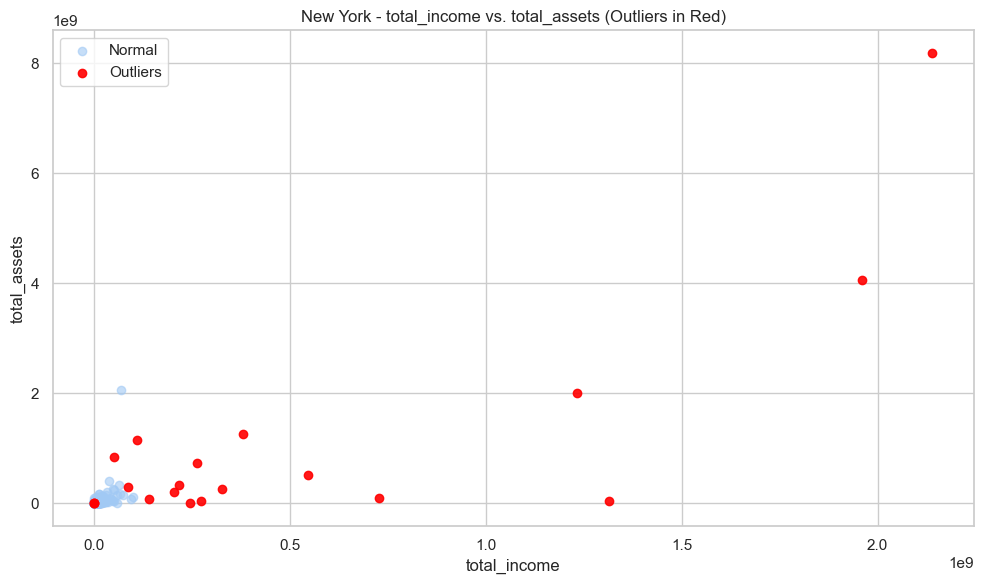

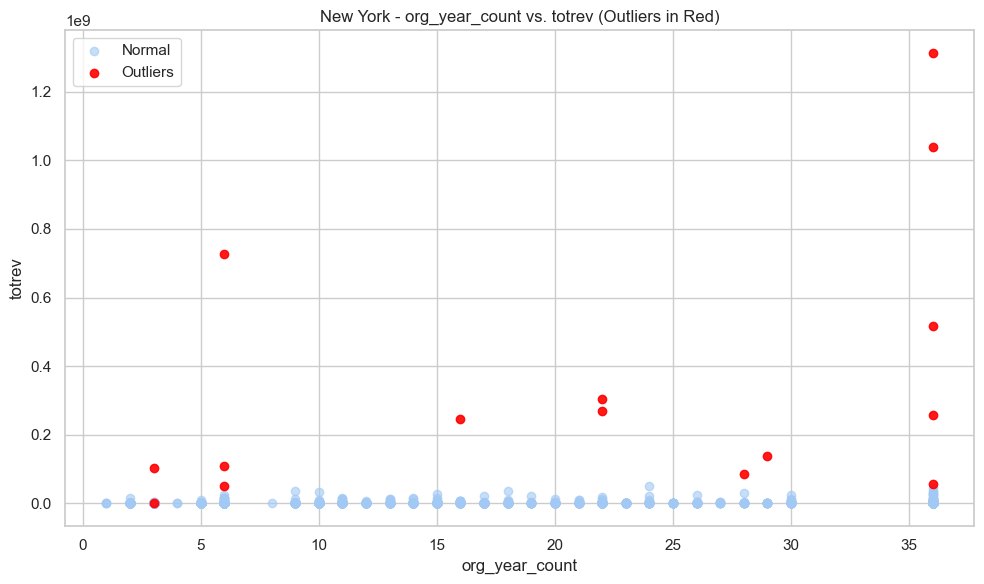

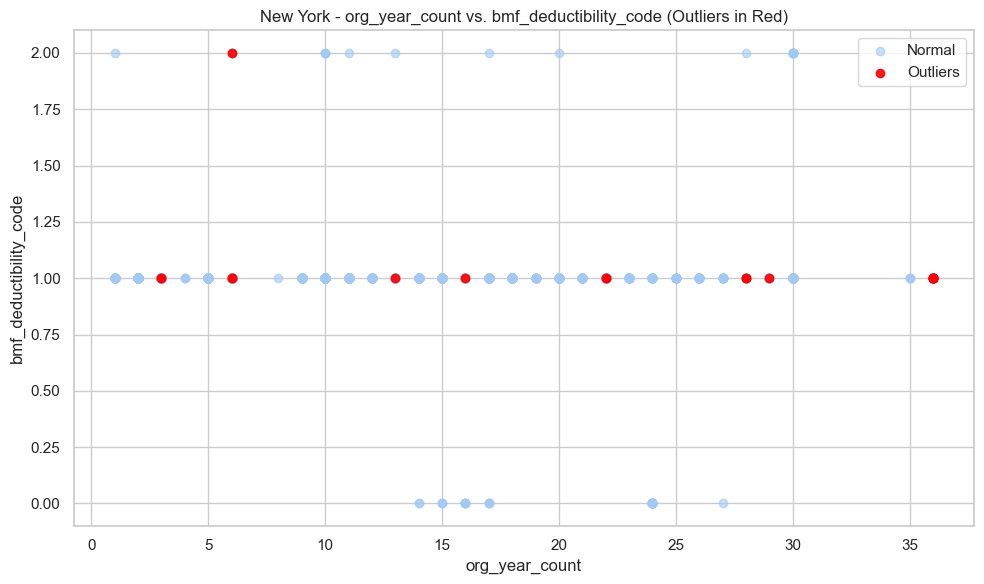

In [90]:
plot_outliers(new_york, "org_year_count", "total_income", "New York")
plot_outliers(new_york, "total_income", "total_assets", "New York")
plot_outliers(new_york, "org_year_count", "totrev", "New York")
plot_outliers(new_york, "org_year_count", "bmf_deductibility_code", "New York")



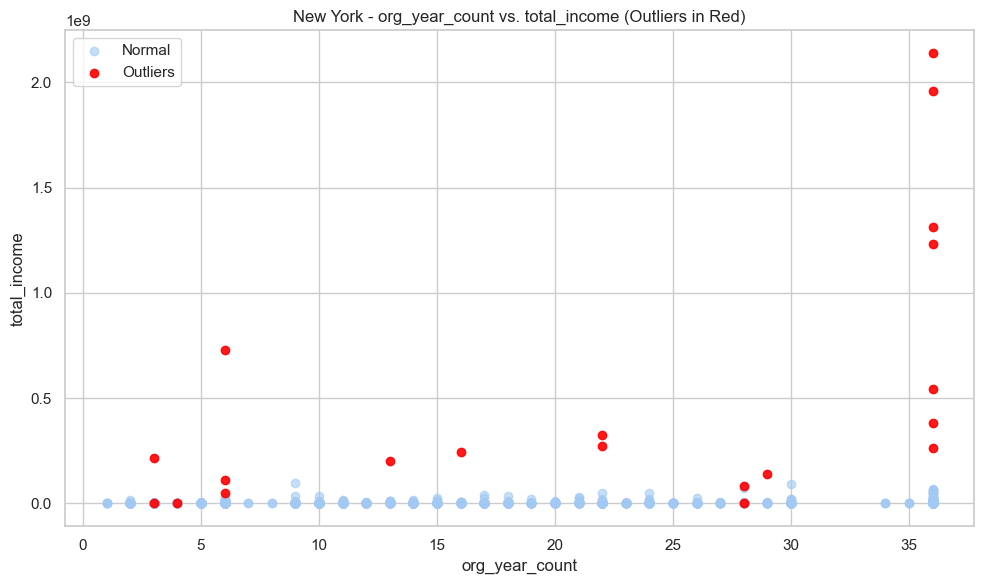

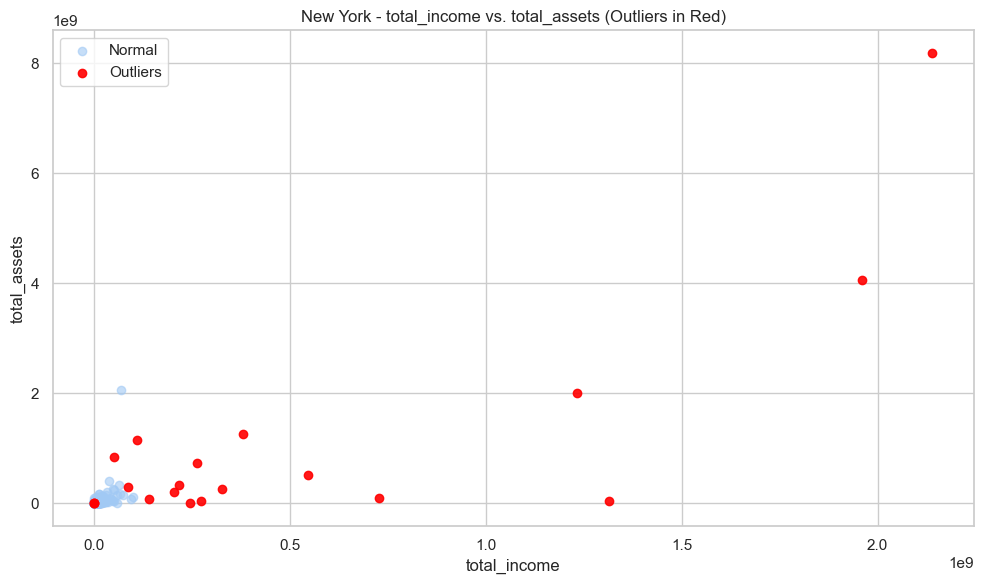

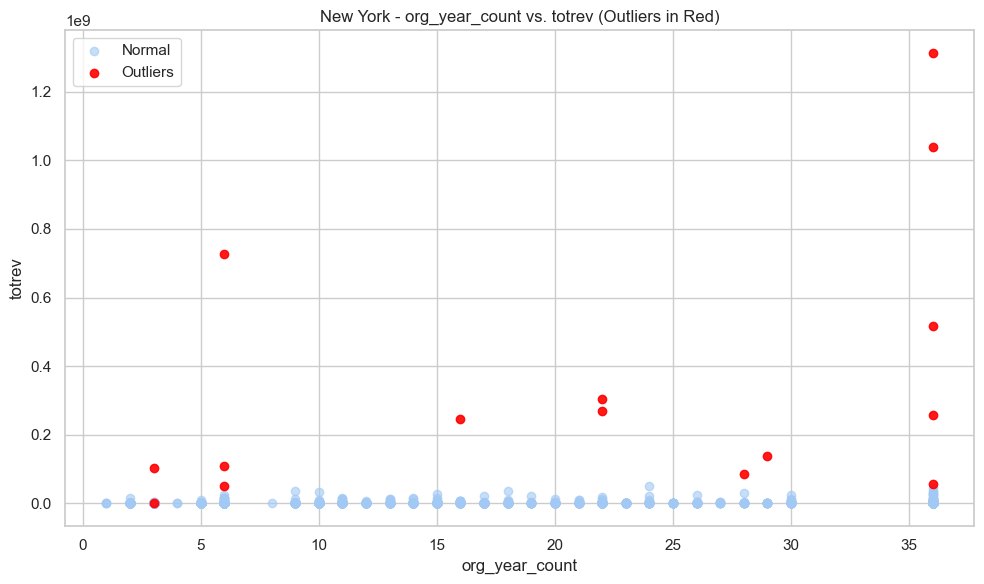

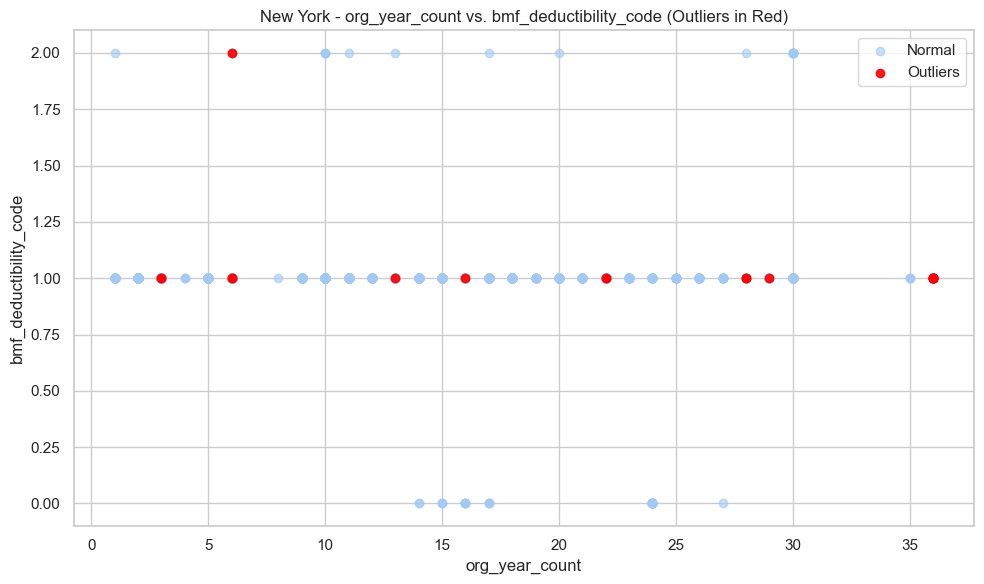

In [ ]:
plot_outliers(new_york, "org_year_count", "total_income", "New York")
plot_outliers(new_york, "total_income", "total_assets", "New York")
plot_outliers(new_york, "org_year_count", "totrev", "New York")
plot_outliers(new_york, "org_year_count", "bmf_deductibility_code", "New York")



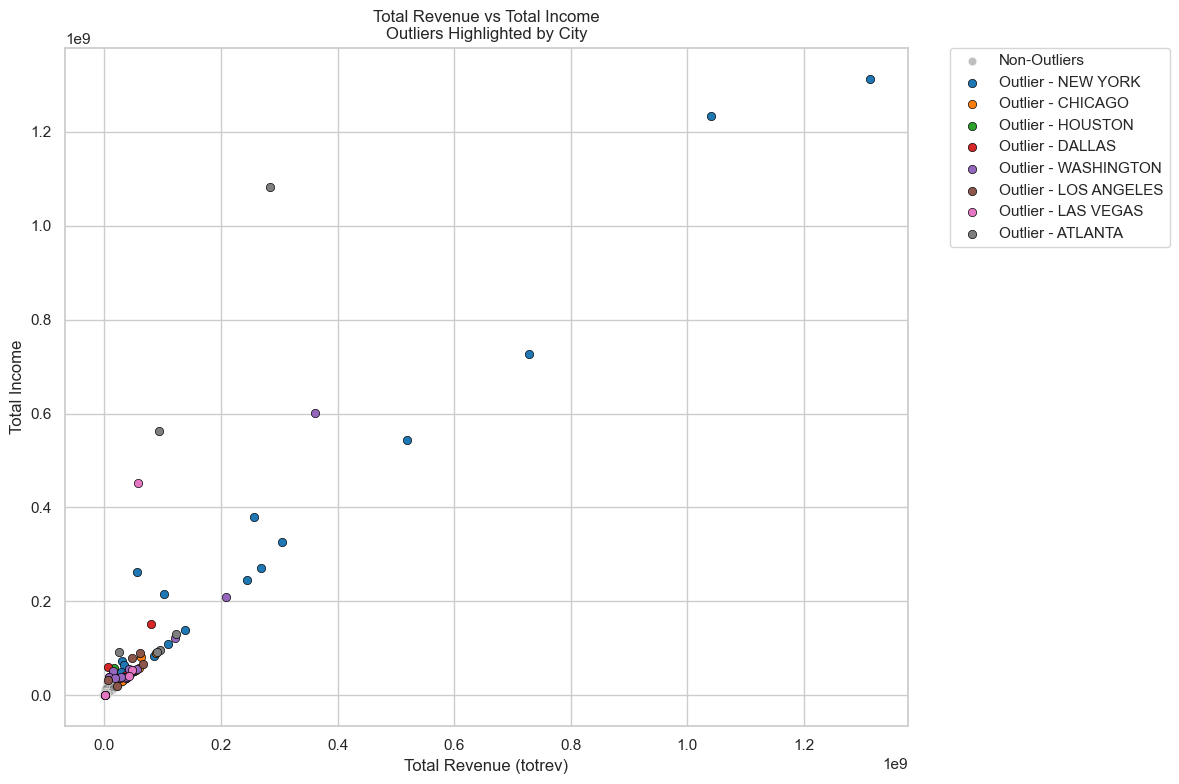

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot all non-outliers in gray
sns.scatterplot(
    data=total[total['outlier'] == False],
    x='totrev',
    y='total_income',
    color='gray',
    alpha=0.5,
    label='Non-Outliers'
)

# List of your 8 cities
cities = ["NEW YORK", "CHICAGO", "HOUSTON", "DALLAS", "WASHINGTON", "LOS ANGELES", "LAS VEGAS", "ATLANTA"]
palette = sns.color_palette("tab10", n_colors=len(cities))

# Plot each city's outliers in a unique color
for i, city in enumerate(cities):
    city_outliers = total[(total['outlier'] == True) & (total['city'] == city)]
    sns.scatterplot(
        data=city_outliers,
        x='totrev',
        y='total_income',
        label=f'Outlier - {city}',
        color=palette[i],
        edgecolor='black'
    )

# Customize appearance
plt.title("Total Revenue vs Total Income\nOutliers Highlighted by City")
plt.xlabel("Total Revenue (totrev)")
plt.ylabel("Total Income")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.grid(True)
plt.show()


In [98]:
import plotly.express as px
import pandas as pd

# Filter outliers and non-outliers
non_outliers = total[total['outlier'] == False]
outliers = total[total['outlier'] == True]

# Base scatter for non-outliers (in gray)
fig = px.scatter(
    non_outliers,
    x='org_year_count',
    y='total_income',
    opacity=0.4,
    color_discrete_sequence=['gray'],
    hover_data=['name', 'city', 'org_year_count', 'total_income'],
    labels={'org_year_count': 'Years in Operation', 'total_income': 'Total Income'},
)

# Overlay outliers grouped by city (each city gets its own color)
fig_outliers = px.scatter(
    outliers,
    x='org_year_count',
    y='total_income',
    color='city',
    hover_data=['name', 'city', 'org_year_count', 'total_income'],
    labels={'org_year_count': 'Years in Operation', 'total_income': 'Total Income'},
)

# Add the outliers as a new trace group into the base figure
for trace in fig_outliers.data:
    fig.add_trace(trace)

# Customize layout
fig.update_layout(
    title="Interactive Scatterplot: Years in Operation vs Total Income (Outliers Highlighted by City)",
    legend_title="City (Outliers)",
    xaxis_title="Years in Operation (org_year_count)",
    yaxis_title="Total Income",
    template="plotly_white",
    height=700
)

# Show plot
fig.show()


In [103]:
total_outliers.to_csv("total_outliers.csv", index=False)

In [105]:
import plotly.express as px
import pandas as pd

# Separate outliers and non-outliers
non_outliers = total[total['outlier'] == False]
outliers = total[total['outlier'] == True]

# Base plot: gray points for non-outliers
fig = px.scatter(
    non_outliers,
    x='totrev',
    y='total_income',
    color_discrete_sequence=['gray'],
    opacity=0.4,
    hover_data=['name', 'city', 'totrev', 'total_income'],
    labels={'totrev': 'Total Revenue', 'total_income': 'Total Income'},
)

# Overlay: outliers colored by city
fig_outliers = px.scatter(
    outliers,
    x='totrev',
    y='total_income',
    color='city',
    hover_data=['name', 'city', 'totrev', 'total_income'],
    labels={'totrev': 'Total Revenue', 'total_income': 'Total Income'},
)

# Add outlier traces to the base plot
for trace in fig_outliers.data:
    fig.add_trace(trace)

# Final plot styling
fig.update_layout(
    title="Interactive Scatterplot: Total Revenue vs Total Income (Outliers Highlighted by City)",
    legend_title="City (Outliers)",
    xaxis_title="Total Revenue",
    yaxis_title="Total Income",
    template="plotly_white",
    height=700
)

fig.show()
fig.write_html("scatterplot_outliers.html")
